# Overview

This project aims to estimate the age of crops by counting the leaves in the input images, which can be 1,2,3,4, and 6 leafs.

# Data Preparation

The dataset used in this project are plant images at different resolutions captured with a variety of cameras. There are images showing plants with approximately 1,2,3,4 and 6 leafs. The images are part of a Leaf counting dataset by Teimouri et al. [1] which can be downloaded from the Aarhus University, Denmark:

There are 200 images for each of the 5 classes. As Figure 1 shows, there is a great variety of plants and image conditions. The dataset is split into a training and a testing set where there are 180 images per class for training and validation; and 20 images for testing.

**The dataset Link:** <a href="https://vision.eng.au.dk/leaf-counting-dataset/">Leaf counting dataset</a>

## Download the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
seed = 42
import os
classs_list = [1, 2, 3, 4, 6]

## Split the dataset

In [2]:
train_df = pd.DataFrame()
for i in classs_list:
    train_dir = f'../input/vission3/Data/training/{i}'
    x_train_path = [os.path.abspath(os.path.join(train_dir, p)) for p in os.listdir(train_dir)]
    new_train_df = pd.DataFrame([x_train_path , [f'{i}']*len(x_train_path)])
    train_df = pd.concat([train_df, new_train_df],axis=1)
train_df =train_df.T
train_df.columns = ['paths', 'class']
train_df.head()

,paths,class
0,/kaggle/input/vission3/Data/training/1/173.png,1
1,/kaggle/input/vission3/Data/training/1/248.png,1
2,/kaggle/input/vission3/Data/training/1/48.png,1
3,/kaggle/input/vission3/Data/training/1/227.png,1
4,/kaggle/input/vission3/Data/training/1/61.png,1


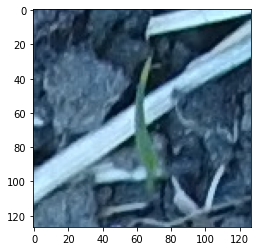

In [3]:
first_train_img = train_df.iloc[0][0]
first_train_img = plt.imread(first_train_img)
plt.imshow(first_train_img)

In [4]:
train_image = np.array([plt.imread(path) for path in train_df['paths'].tolist()])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [5]:
test_df = pd.DataFrame()
for i in classs_list:
    test_dir = f'../input/vission3/Data/testing/{i}'
    x_test_path = [os.path.abspath(os.path.join(test_dir, p)) for p in os.listdir(test_dir)]
    new_test_df = pd.DataFrame([x_test_path , [f'{i}']*len(x_test_path)])
    test_df = pd.concat([test_df, new_test_df],axis=1)
test_df =test_df.T
test_df.columns = ['paths', 'class']
test_df

,paths,class
0,/kaggle/input/vission3/Data/testing/1/303.png,1
1,/kaggle/input/vission3/Data/testing/1/296.png,1
2,/kaggle/input/vission3/Data/testing/1/281.png,1
3,/kaggle/input/vission3/Data/testing/1/311.png,1
4,/kaggle/input/vission3/Data/testing/1/284.png,1
...,...,...
15,/kaggle/input/vission3/Data/testing/6/274.png,6
16,/kaggle/input/vission3/Data/testing/6/275.png,6
17,/kaggle/input/vission3/Data/testing/6/273.png,6
18,/kaggle/input/vission3/Data/testing/6/269.png,6


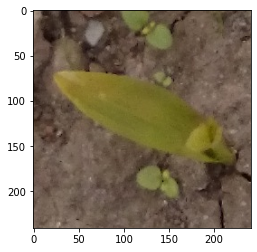

In [6]:
first_test_img = test_df.iloc[0][0]
first_test_img = plt.imread(first_test_img)
plt.imshow(first_test_img)

In [7]:
test_image = np.array([plt.imread(path) for path in test_df['paths'].tolist()])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


## Visualize five images from the dataset

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


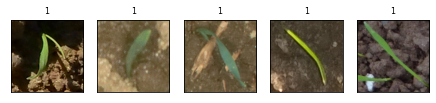

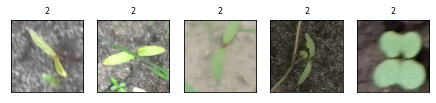

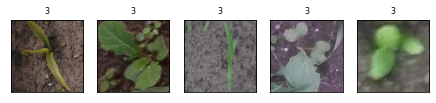

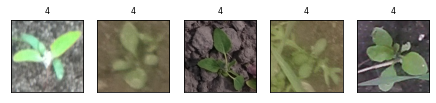

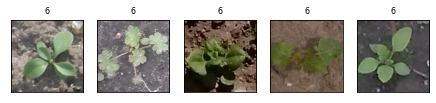

In [8]:
for idx in classs_list:
    rows, columns = 1, 5
    img_vis = np.array([plt.imread(path) for path in train_df[train_df['class']==f'{idx}']['paths'].tolist()])

    # define figure
    fig=plt.figure(figsize=(7.5, 7.5))
    # visualize these random images
    for i in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, i)
        ax.set_title(f'{idx}', fontsize=8)
        plt.imshow(img_vis[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [9]:
c = 0
for i in train_image:
    print(i.shape)
    if c >10:
        break
    c+=1

(127, 127, 3)
(143, 143, 3)
(97, 97, 3)
(161, 161, 3)
(135, 135, 3)
(295, 293, 3)
(99, 99, 3)
(131, 131, 3)
(135, 135, 3)
(97, 97, 3)
(181, 181, 3)
(283, 232, 3)


In [10]:
c=0
for i in test_image:
    print(i.shape)
    if c >10:
        break
    c+=1

(241, 241, 3)
(163, 163, 3)
(245, 245, 3)
(115, 115, 3)
(121, 121, 3)
(103, 103, 3)
(187, 187, 3)
(897, 897, 3)
(137, 137, 3)
(137, 137, 3)
(193, 193, 3)
(113, 113, 3)


## Apply the one-hot encoding on the target column

In [12]:
import  sklearn
from sklearn.preprocessing import OneHotEncoder

y_train_ = train_df['class']
y_test = test_df['class']
one_hot_encoder  = OneHotEncoder(sparse=False)
y_train_encoded_ = one_hot_encoder.fit_transform(y_train_.values.reshape(-1,1))
y_test_encoded = one_hot_encoder.transform(y_test.values.reshape(-1,1))

## Resize the input images

In [14]:
from skimage.transform import resize

VGG_input_size = (64*2, 64*2, 3)
X_train_resized_ = np.array([resize(img, output_shape=VGG_input_size) for img in train_image ])
X_test_resized =  np.array([resize(img, output_shape=VGG_input_size) for img in test_image ])
X_train_resized_.shape

(900, 128, 128, 3)

## Split the dataset to train and validation sets

In [15]:
from sklearn.model_selection import train_test_split

X_train_resized, X_val_resized, y_train, y_val = train_test_split(X_train_resized_, y_train_, test_size=0.2, random_state=42)

In [16]:
X_train_resized, X_val_resized, y_train_encoded, y_val_encoded = train_test_split(X_train_resized_, y_train_encoded_, test_size=0.2, random_state=42)

# Problem formulation

## Transfer Learning - Classification Network
For this assignment, you are asked to use the Keras implementation of VGG-16 as a starting point.

Using the Keras implementation of VGG-16 till the first 2 blocks of VGG-16 add extra Keras layers to create our own version of CNN model for the classification according to the number of leaves in the plant images. Note that there will be 5 classes.

I will use unified model architecture to build a fair comparison in the experiments.

## Early Stopping
I used the early stopping technique, to prevent the model from overfitting while checking its future behavior.

In [17]:
import tensorflow as tf
early_stopping_callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=20,
    verbose=0,
    restore_best_weights=True,
    mode="max",
)

### Build the Unified Custom Model:
- Get the 6th layer in VGG model which is the block 2 pool output
- Add my custom layers:
    - Conv2D (32) -> MaxPooling2D(2)
    - Conv2D (64) -> MaxPooling2D(2)
    - Dense (128)
    - Dense (5)

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

VGG_model = tf.keras.applications.VGG16(include_top=False,weights="imagenet",input_shape=VGG_input_size)
# select the first 2 blocks of VGG
VGG_model.trainable = False
x = VGG_model.layers[6].output

# add conv layer + dense layer + output layer
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(5, activation='softmax')(x)

VGG_model = models.Model(VGG_model.input, output)
VGG_model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

VGG_model.summary()

2022-11-23 01:22:25.633779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 01:22:25.642060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 01:22:25.642842: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 01:22:25.644398: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [19]:
history_VGG_model = VGG_model.fit(X_train_resized, y_train_encoded, batch_size = 64,  epochs=500,
                                  validation_data = (X_val_resized, y_val_encoded), callbacks=[early_stopping_callback])

2022-11-23 01:22:27.293078: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500


2022-11-23 01:22:28.274123: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


12/12 [==============================] - 5s 151ms/step - loss: 8.0755 - accuracy: 0.1903 - val_loss: 1.9055 - val_accuracy: 0.2167
Epoch 2/500
12/12 [==============================] - 0s 29ms/step - loss: 1.6613 - accuracy: 0.2347 - val_loss: 1.6173 - val_accuracy: 0.2222
Epoch 3/500
12/12 [==============================] - 0s 29ms/step - loss: 1.5583 - accuracy: 0.3028 - val_loss: 1.5976 - val_accuracy: 0.2389
Epoch 4/500
12/12 [==============================] - 0s 29ms/step - loss: 1.4829 - accuracy: 0.3736 - val_loss: 1.5865 - val_accuracy: 0.2556
Epoch 5/500
12/12 [==============================] - 0s 31ms/step - loss: 1.3785 - accuracy: 0.4264 - val_loss: 1.5154 - val_accuracy: 0.3444
Epoch 6/500
12/12 [==============================] - 0s 28ms/step - loss: 1.2076 - accuracy: 0.5417 - val_loss: 1.4921 - val_accuracy: 0.3722
Epoch 7/500
12/12 [==============================] - 0s 29ms/step - loss: 1.0520 - accuracy: 0.5972 - val_loss: 1.4811 - val_accuracy: 0.3778
Epoch 8/500
12/12

**Train accuracy**

In [20]:
VGG_model.evaluate(X_train_resized, y_train_encoded)

23/23 [==============================] - 1s 13ms/step - loss: 0.0011 - accuracy: 1.0000


[0.001059080706909299, 1.0]

**Validation accuracy**

In [21]:
VGG_model.evaluate(X_val_resized, y_val_encoded)

6/6 [==============================] - 0s 86ms/step - loss: 2.8865 - accuracy: 0.4667


[2.8864948749542236, 0.46666666865348816]

**Testing accuracy**

In [22]:
VGG_model.evaluate(X_test_resized, y_test_encoded)

4/4 [==============================] - 0s 55ms/step - loss: 2.4721 - accuracy: 0.4300


[2.4720683097839355, 0.4300000071525574]

**Learning accuracy curve**

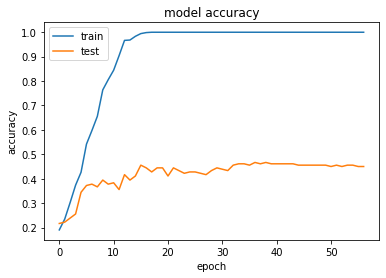

In [23]:
plt.plot(history_VGG_model.history['accuracy'])
plt.plot(history_VGG_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train', 'test']);

**Learning Loss curve**

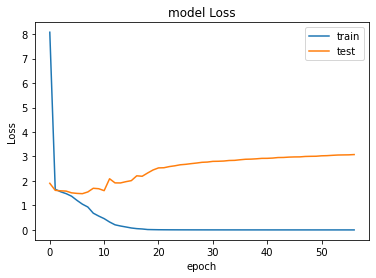

In [24]:
plt.plot(history_VGG_model.history['loss'])
plt.plot(history_VGG_model.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss');
plt.xlabel('epoch');
plt.legend(['train', 'test']);

**Training confusion matrix**

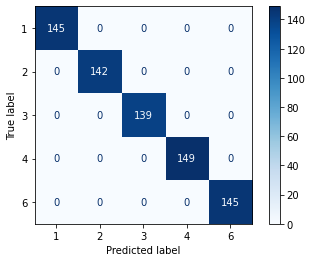

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


data_concat = X_train_resized # np.concatenate((X_train_resized, X_val_resized))
prediction = VGG_model.predict(data_concat)
true_concate = y_train_encoded # np.concatenate((y_train_encoded, y_val_encoded))
conf_mat=confusion_matrix(np.argmax(true_concate,1),np.argmax(prediction,1))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels = classs_list)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Validation confusion matrix**

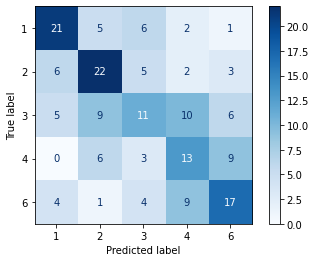

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

data_concat = X_val_resized # np.concatenate((X_train_resized, X_val_resized))
prediction = VGG_model.predict(data_concat)
true_concate = y_val_encoded # np.concatenate((y_train_encoded, y_val_encoded))
conf_mat=confusion_matrix(np.argmax(true_concate,1),np.argmax(prediction,1))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels = classs_list)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Testing confusion matrix**

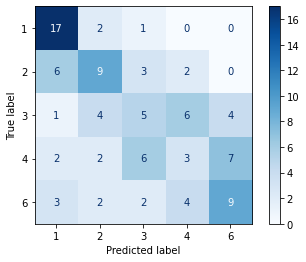

In [27]:
prediction = VGG_model.predict(X_test_resized)
true = y_test_encoded

conf_mat=confusion_matrix(np.argmax(true,1),np.argmax(prediction,1))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels = classs_list)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Transfer Learning - Regression Reformulation

Reformulate as a regression problem, by changing the output layer to be a single float value ranging between 0 to 6 corresponding to the number of leaves.

In [28]:
import tensorflow as tf
early_stopping_callback_reg=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=150,
    verbose=0,
    restore_best_weights=True,
    mode="min",
)

### Apply a map function to map the regressor output to discrete class

In [29]:
def class_maper(y_pred):
    """ 
    As the regrision out in range of -inf to inf so i should map it to the catigoris i have i range of 0 to 6
    """
    a = y_pred
    a[a<=1.5] = 1.0
    a[(1.5<a) & (a<=2.5)] = 2.0
    a[(2.5<a) & (a<=3.5)] = 3.0
    a[(3.5<a) & (a<=5.0)] = 4.0
    a[5.0<a] = 6.0
    return a

In [30]:
# Example
import numpy as np

a = np.array([[-1.2], [.2], [1.5] ,[2.1], [3.2], [3.7], [5.5], [7.0]])
class_maper(a)

array([[1.],
       [1.],
       [1.],
       [2.],
       [3.],
       [4.],
       [6.],
       [6.]])

### Custom accuracy metric
Build custom metric to fit with the regression formulation output

In [34]:
from sklearn.metrics import accuracy_score

def rounded_accuracy(y_true, y_pred):    
    train_prediction = np.squeeze(class_maper(np.array(y_pred)))
    train_true =  np.array(y_true, dtype = 'float32')
    return accuracy_score(train_true, train_prediction)


def rounded_accuracy_metric(y_true, y_pred):
    return tf.py_function(func=rounded_accuracy, inp=[y_true, y_pred], Tout=tf.float32)

In [32]:
VGG_model = tf.keras.applications.VGG16(include_top=False,weights="imagenet",input_shape=VGG_input_size)
# select the first 2 blocks of VGG
VGG_model.trainable = False
x = VGG_model.layers[6].output

# add conv layer + dense layer + output layer
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(128)(x)
output = layers.Dense(1)(x)

VGG_model_reg = models.Model(VGG_model.input, output)

VGG_model_reg.compile(optimizer='Adam', loss=['mse'], metrics=[rounded_accuracy_metric])

VGG_model_reg.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [35]:
history_VGG_model_reg = VGG_model_reg.fit(X_train_resized, y_train.astype(float), batch_size = 64, epochs=500,
                                          validation_data = (X_val_resized, y_val.astype(float)), callbacks = [early_stopping_callback_reg])

Epoch 1/500
12/12 [==============================] - 1s 51ms/step - loss: 3921.8879 - rounded_accuracy_metric: 0.1940 - val_loss: 68.0555 - val_rounded_accuracy_metric: 0.1959
Epoch 2/500
12/12 [==============================] - 0s 34ms/step - loss: 73.3516 - rounded_accuracy_metric: 0.2188 - val_loss: 23.2136 - val_rounded_accuracy_metric: 0.1991
Epoch 3/500
12/12 [==============================] - 0s 32ms/step - loss: 10.8421 - rounded_accuracy_metric: 0.1875 - val_loss: 6.9342 - val_rounded_accuracy_metric: 0.2063
Epoch 4/500
12/12 [==============================] - 0s 29ms/step - loss: 4.4940 - rounded_accuracy_metric: 0.2214 - val_loss: 4.7020 - val_rounded_accuracy_metric: 0.2063
Epoch 5/500
12/12 [==============================] - 0s 29ms/step - loss: 3.7392 - rounded_accuracy_metric: 0.2161 - val_loss: 3.1057 - val_rounded_accuracy_metric: 0.1839
Epoch 6/500
12/12 [==============================] - 0s 29ms/step - loss: 3.4393 - rounded_accuracy_metric: 0.2461 - val_loss: 2.8469

**Training Accuracy**

In [47]:
train_prediction = np.squeeze(class_maper(np.array(VGG_model_reg.predict(X_train_resized))))
train_true =  np.array(y_train, dtype = 'float32')
print(accuracy_score(train_prediction, train_true))

0.6472222222222223


**Validation accuracy**

In [48]:
from sklearn.metrics import accuracy_score

val_prediction = np.squeeze(class_maper(np.array(VGG_model_reg.predict(X_val_resized))))
val_true =  np.array(y_val, dtype = 'float32')
print(accuracy_score(val_prediction, val_true))

0.3277777777777778


**Testing accuracy**

In [49]:
from sklearn.metrics import accuracy_score

test_prediction = np.squeeze(class_maper(np.array(VGG_model_reg.predict(X_test_resized))))
test_true =  np.array(y_test, dtype = 'float32')
print(accuracy_score(test_prediction, test_true))

0.31


**Learning accuracy curve**

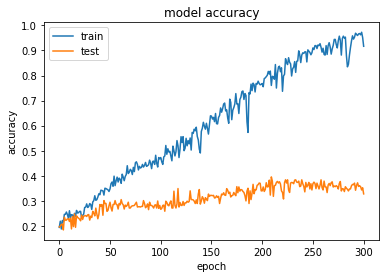

In [50]:
plt.plot(history_VGG_model_reg.history['rounded_accuracy_metric'])
plt.plot(history_VGG_model_reg.history['val_rounded_accuracy_metric'])
plt.title('model accuracy')
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train', 'test']);

**Learning Loss curve**

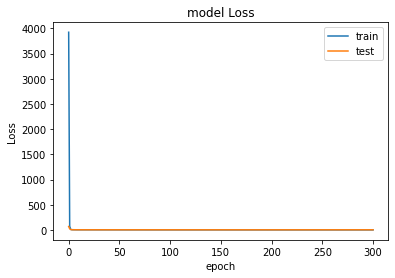

In [51]:
plt.plot(history_VGG_model_reg.history['loss'])
plt.plot(history_VGG_model_reg.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss');
plt.xlabel('epoch');
plt.legend(['train', 'test']);

**Training confusion matrix**

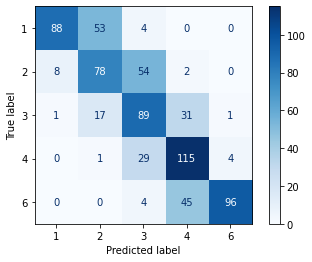

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


data_concat = X_train_resized # np.concatenate((X_train_resized, X_val_resized))

# prediction = np.squeeze(np.round_(VGG_model_reg.predict(data_concat)))
prediction = np.squeeze(class_maper(np.array(VGG_model_reg.predict(data_concat))))
true_concat =  np.array(y_train, dtype = 'float32')# np.array(pd.concat([y_train,y_val],axis=0), dtype = 'float32')

conf_mat=confusion_matrix(np.round(true_concat),np.round(prediction))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels = classs_list)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Validation confusion matrix**

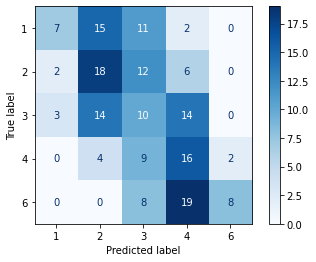

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


data_concat = X_val_resized # np.concatenate((X_train_resized, X_val_resized))

# prediction = np.squeeze(np.round_(VGG_model_reg.predict(data_concat)))
prediction = np.squeeze(class_maper(np.array(VGG_model_reg.predict(data_concat))))
true_concat =  np.array(y_val, dtype = 'float32')# np.array(pd.concat([y_train,y_val],axis=0), dtype = 'float32')

conf_mat=confusion_matrix(np.round(true_concat),np.round(prediction))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels = classs_list)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Testing confusion matrix**

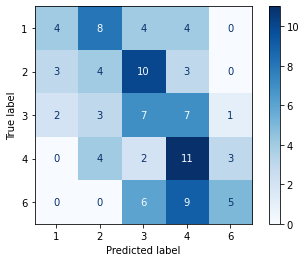

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# prediction = np.squeeze(np.round_(VGG_model_reg.predict(X_test_resized)))
prediction = np.squeeze(class_maper(np.array((VGG_model_reg.predict(X_test_resized)))))

true_concat = np.array(y_test, dtype = 'float32')

conf_mat=confusion_matrix(np.round(true_concat),np.round(prediction))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels = classs_list)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Conclusion

**As shown in the table below:**

|                               |  Training accuracy |  Validation accuracy |    Testing accuracy  |
|-------------------------------|--------------------|----------------------|----------------------|
|  **Part1 a (Classification)** |         100%       |          46%         |          43%         |
|  **Part1 b (Regression)**     |         64%        |          32.7%         |          31%         |


- **The first model which is in part1 a (classification):** the model is overfitting the training dataset as the training accuracy is much higher than the validation and testing accuracy, as the dataset is small and the model has no regularization or dropout layers to prevent the overfitting.

- **The second model which is in part 1 b (regression):** the model is slightly overfitting the training dataset as the training is much higher than the validation and testing accuracy, as the dataset is small and needs to be augmented.

- **The best model is the classification,** as it has the highest validation and testing accuracy.

- **Both models are overfitting,** due to the small size of the training set in addition to the absence of regularization, batch normalization, and augmentation in part one.

- **Finally,** we expect part 2 to be more generalized and the training accuracy to be reduced, and the validation, and testing accuracy to increase after adding the batch normalization, dropout, and increase in the training size using augmentation.


# Improve the Superior Model

Regularization and data augmentation are common strategies to deal with small datasets.

## Apply Regularization
- Batch Normalization
- Dropout

In [55]:
import tensorflow as tf
from tensorflow.keras import layers, models

VGG_model_reg_batch = tf.keras.applications.VGG16(include_top=False,weights="imagenet",input_shape=VGG_input_size)
# select the first 2 blocks of VGG
VGG_model_reg_batch.trainable = False
x = VGG_model_reg_batch.layers[6].output

# add conv layer + dense layer + output layer
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(.5)(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(.5)(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(.5)(x)

output = layers.Dense(5, activation='softmax')(x)

VGG_model_reg_batch = models.Model(VGG_model_reg_batch.input, output)
VGG_model_reg_batch.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

VGG_model_reg_batch.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [56]:
history_VGG_model_reg_batch = VGG_model_reg_batch.fit(X_train_resized, y_train_encoded, batch_size = 64,  epochs=500,
                                  validation_data = (X_val_resized, y_val_encoded), callbacks=[early_stopping_callback])

Epoch 1/500
12/12 [==============================] - 1s 51ms/step - loss: 2.5073 - accuracy: 0.2069 - val_loss: 6.9994 - val_accuracy: 0.2167
Epoch 2/500
12/12 [==============================] - 0s 29ms/step - loss: 1.9867 - accuracy: 0.3264 - val_loss: 5.0798 - val_accuracy: 0.2167
Epoch 3/500
12/12 [==============================] - 0s 29ms/step - loss: 1.8023 - accuracy: 0.3667 - val_loss: 5.3387 - val_accuracy: 0.2167
Epoch 4/500
12/12 [==============================] - 0s 31ms/step - loss: 1.5654 - accuracy: 0.4264 - val_loss: 3.7254 - val_accuracy: 0.2278
Epoch 5/500
12/12 [==============================] - 0s 30ms/step - loss: 1.3026 - accuracy: 0.4986 - val_loss: 3.4802 - val_accuracy: 0.2389
Epoch 6/500
12/12 [==============================] - 0s 30ms/step - loss: 1.2807 - accuracy: 0.5083 - val_loss: 4.2748 - val_accuracy: 0.1944
Epoch 7/500
12/12 [==============================] - 0s 31ms/step - loss: 1.1925 - accuracy: 0.5125 - val_loss: 2.6259 - val_accuracy: 0.2556
Epoch 

**Training accuracy**

In [57]:
VGG_model_reg_batch.evaluate(X_train_resized, y_train_encoded)

23/23 [==============================] - 0s 13ms/step - loss: 0.3977 - accuracy: 0.8764


[0.39771443605422974, 0.8763889074325562]

**Validation accuracy**

In [58]:
VGG_model_reg_batch.evaluate(X_val_resized, y_val_encoded)

6/6 [==============================] - 0s 11ms/step - loss: 1.6293 - accuracy: 0.5500


[1.6293214559555054, 0.550000011920929]

**Testing accuracy**

In [59]:
VGG_model_reg_batch.evaluate(X_test_resized, y_test_encoded)

4/4 [==============================] - 0s 10ms/step - loss: 1.8615 - accuracy: 0.4300


[1.8615007400512695, 0.4300000071525574]

**Learning accuracy curve**

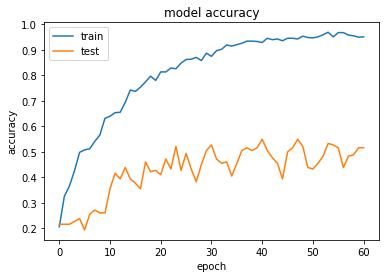

In [60]:
plt.plot(history_VGG_model_reg_batch.history['accuracy'])
plt.plot(history_VGG_model_reg_batch.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train', 'test']);

**Learning Loss curve**

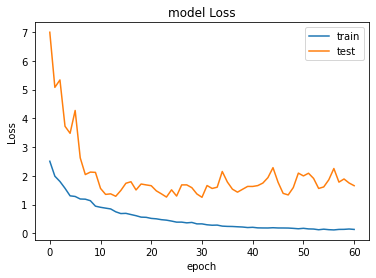

In [61]:
plt.plot(history_VGG_model_reg_batch.history['loss'])
plt.plot(history_VGG_model_reg_batch.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss');
plt.xlabel('epoch');
plt.legend(['train', 'test']);

**Training confusion matrix**

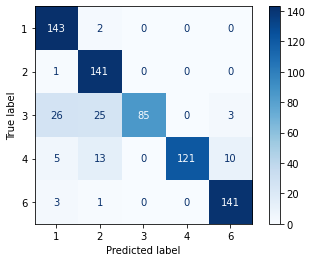

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


data_concat = X_train_resized # np.concatenate((X_train_resized, X_val_resized))

prediction = VGG_model_reg_batch.predict(data_concat)
true_concate = y_train_encoded # np.concatenate((y_train_encoded, y_val_encoded))

conf_mat=confusion_matrix(np.argmax(true_concate,1),np.argmax(prediction,1))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels = classs_list)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Validation confusion matrix**

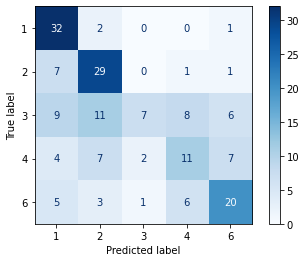

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


data_concat = X_val_resized # np.concatenate((X_train_resized, X_val_resized))

prediction = VGG_model_reg_batch.predict(data_concat)
true_concate = y_val_encoded # np.concatenate((y_train_encoded, y_val_encoded))

conf_mat=confusion_matrix(np.argmax(true_concate,1),np.argmax(prediction,1))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels = classs_list)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Testing confusion matrix**

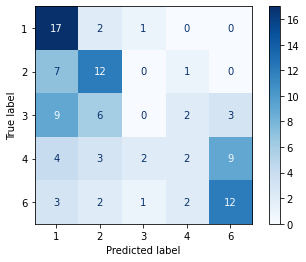

In [64]:
prediction = VGG_model_reg_batch.predict(X_test_resized)
true = y_test_encoded

conf_mat=confusion_matrix(np.argmax(true,1),np.argmax(prediction,1))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels = classs_list)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Data augmentation

In [68]:
import tensorflow as tf
early_stopping_callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=50,
    verbose=0,
    restore_best_weights=True,
    mode="max",
)

### Try different augmentations

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator= ImageDataGenerator(
        rotation_range=5,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         shear_range=0.1,
        zoom_range=0.6,
#         horizontal_flip=True,
        vertical_flip=True,
#         fill_mode='nearest'
)

In [70]:
import tensorflow as tf
from tensorflow.keras import layers, models

VGG_model_augm = tf.keras.applications.VGG16(include_top=False,weights="imagenet",input_shape=VGG_input_size)
# select the first 2 blocks of VGG
VGG_model_augm.trainable = False
x = VGG_model_augm.layers[6].output

# add conv layer + dense layer + output layer
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(.3)(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(.3)(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(.5)(x)

output = layers.Dense(5, activation='softmax')(x)

VGG_model_augm = models.Model(VGG_model_augm.input, output)
VGG_model_augm.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

VGG_model_augm.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [71]:
history_VGG_model_augm = VGG_model_augm.fit_generator(generator.flow(X_train_resized, y_train_encoded, batch_size=64),  epochs=500,
                                  validation_data = (X_val_resized, y_val_encoded), callbacks=[early_stopping_callback])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
12/12 [==============================] - 4s 261ms/step - loss: 2.4419 - accuracy: 0.2653 - val_loss: 15.5751 - val_accuracy: 0.2278
Epoch 2/500
12/12 [==============================] - 3s 236ms/step - loss: 2.1006 - accuracy: 0.2708 - val_loss: 5.2724 - val_accuracy: 0.1833
Epoch 3/500
12/12 [==============================] - 3s 223ms/step - loss: 1.9177 - accuracy: 0.3069 - val_loss: 7.7431 - val_accuracy: 0.1722
Epoch 4/500
12/12 [==============================] - 3s 210ms/step - loss: 1.7705 - accuracy: 0.3167 - val_loss: 7.1934 - val_accuracy: 0.1722
Epoch 5/500
12/12 [==============================] - 3s 240ms/step - loss: 1.7644 - accuracy: 0.3444 - val_loss: 5.0629 - val_accuracy: 0.1722
Epoch 6/500
12/12 [==============================] - 3s 216ms/step - loss: 1.5977 - accuracy: 0.3889 - val_loss: 3.4964 - val_accuracy: 0.2000
Epoch 7/500
12/12 [==============================] - 3s 263ms/step - loss: 1.5209 - accuracy: 0.4264 - val_loss: 3.0277 - val_accuracy: 0.238

**Training accuracy**

In [72]:
VGG_model_augm.evaluate(X_train_resized, y_train_encoded)

23/23 [==============================] - 0s 13ms/step - loss: 0.4910 - accuracy: 0.8194


[0.49096187949180603, 0.8194444179534912]

**Validation accuracy**

In [73]:
VGG_model_augm.evaluate(X_val_resized, y_val_encoded)

6/6 [==============================] - 0s 11ms/step - loss: 1.5335 - accuracy: 0.6556


[1.5334833860397339, 0.6555555462837219]

**Testing accuracy**

In [74]:
VGG_model_augm.evaluate(X_test_resized, y_test_encoded)

4/4 [==============================] - 0s 9ms/step - loss: 1.7473 - accuracy: 0.5500


[1.7473177909851074, 0.550000011920929]

**Learning accuracy curve**

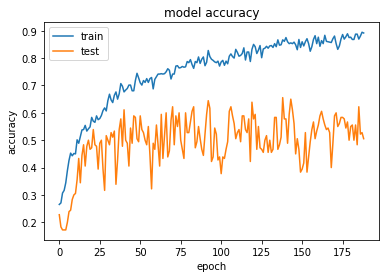

In [75]:
plt.plot(history_VGG_model_augm.history['accuracy'])
plt.plot(history_VGG_model_augm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy');
plt.xlabel('epoch');
plt.legend(['train', 'test']);

**Learning Loss curve**

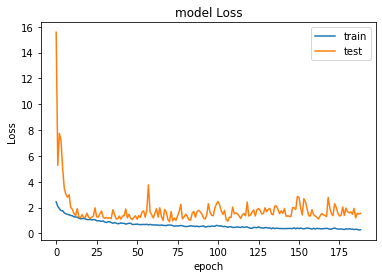

In [76]:
plt.plot(history_VGG_model_augm.history['loss'])
plt.plot(history_VGG_model_augm.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss');
plt.xlabel('epoch');
plt.legend(['train', 'test']);

**Training confusion matrix**

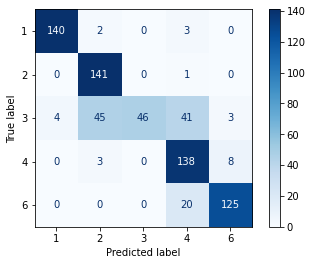

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


data_concat = X_train_resized # np.concatenate((X_train_resized, X_val_resized))
prediction = VGG_model_augm.predict(data_concat)

true_concate =  y_train_encoded # np.concatenate((y_train_encoded, y_val_encoded))
conf_mat=confusion_matrix(np.argmax(true_concate,1),np.argmax(prediction,1))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels = classs_list)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Validation confusion matrix**

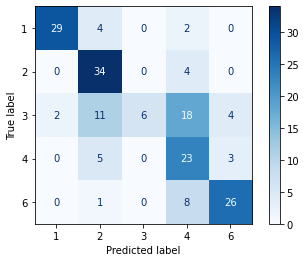

In [78]:
data_concat = X_val_resized # np.concatenate((X_train_resized, X_val_resized))
prediction = VGG_model_augm.predict(data_concat)

true_concate = y_val_encoded # np.concatenate((y_train_encoded, y_val_encoded))
conf_mat=confusion_matrix(np.argmax(true_concate,1), np.argmax(prediction,1))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels = classs_list)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Testing confusion matrix**

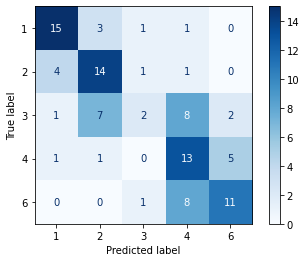

In [79]:
prediction = VGG_model_augm.predict(X_test_resized)
true = y_test_encoded

conf_mat=confusion_matrix(np.argmax(true,1),np.argmax(prediction,1))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels = classs_list)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Conclusion:

**As shown in the figure below:**

|                                                                      | Training accuracy | Validation accuracy | Testing accuracy |
|----------------------------------------------------------------------|-------------------|---------------------|------------------|
| **Part1a (Classification)**                                          | 100%              | 46%                 | 43%              |
| **Part2 (regularization + batch normalization)**                     | 87%               | 55%                 | 44%              |
| **Part2 (regularization + batch normalization + data augmentation)** | 81%               | 66%                 | 55%              |






**The above table fits our expectations as we discussed before in part1:**

- **The first experiment by adding some batch normalization and dropout layers:**
    - The model begins to generalize better as the training accuracy reduced from 100% to 87% while the validation and testing increased to 55% and 44%, so it's definitely a huge improvement.
    - Still has kind of overfitting, as training accuracy is 88% while the validation and testing are around 50% but the dropout and batch normalization help the model to generalize a bit.


- **The second experiment after augmenting the training set and retraining the regulized network we found:**
    - The model becomes more generalized as the training dataset has been increased, which allowed the model to learn better the different variations in the data such as zooming, rotation, and flipping.
    - The training accuracy decreased from 87% to 81%, while the validation and testing accuracy increased significantly to 66% and 55%, almost 11% improvement in both validation and testing accuracies.


- **Finally,** both regularization and augmentation helped the model to generalize better and reduced the overfitting, as the augmentation helped to increase the small size of the training set, and the regularization prevent the model's weight from overfitting.

## References
[1] N. Teimouri, M. Dyrmann, P. R. Nielsen, S. K. Mathiassen, G. J. Somerville, and R. N. Jørgensen, “Weed growth stage estimator using deep convolutional neural networks,” Sensors, vol. 18, no. 5, 2018.